In [1]:
import numpy as np
import pca
import matplotlib.pyplot as plt

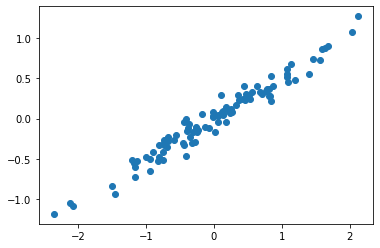

In [2]:
og = np.loadtxt('pca_dataset.txt')
og = og - np.mean(og, axis=0)
plt.scatter(og[:,0], og[:,1])

Old shape:  (100, 2)
New shape:  (100, 1)


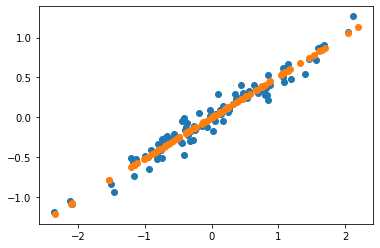

In [3]:
reconstructed, transformed = pca.transform(og, 1)
print("Old shape: ", og.shape)
print("New shape: ", transformed.shape)
plt.scatter(og[:,0], og[:,1])
plt.scatter(reconstructed[:,0], reconstructed[:,1])

In [4]:
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

'Energy' (Explained Variance):  [0.99870002 0.00689572]


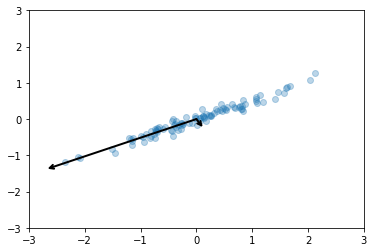

In [5]:
_, _, VT = np.linalg.svd(og)
reconstructed, transformed = pca.transform(og, 2)
explained_variance = pca.explained_variance(transformed, 2, og.shape[0])
print("'Energy' (Explained Variance): ", explained_variance)
ax = plt.gca()
plt.scatter(og[:, 0], og[:, 1], alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
for length, vector in zip(explained_variance, VT):
    v = vector * 3 * np.sqrt(length)
    draw_vector([0, 0], v, ax)